# Heart Failure Prediction Project

**12 clinical features por predicting death events.**

**Author: Andrii Kobyliuk**

# PART 0 - Preparing
**Import Libaries**

In [1]:
import numpy as np
import pandas as pd

import collections
import random as rnd
import time
import multiprocessing as mp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import os

**Show Input Files**


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cardiovascular-disease/sample_submission.csv
/kaggle/input/cardiovascular-disease/train.csv
/kaggle/input/cardiovascular-disease/test.csv


# PART 1 - Data Sets

**Import Data Set**

In [3]:
train = pd.read_csv("../input/cardiovascular-disease/train.csv")
test = pd.read_csv("../input/cardiovascular-disease/test.csv")

**Overview Train Data Set**

In [4]:
train.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,label
0,0,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129,1
1,1,65.0,1,305,0,25,0,298000.00,1.10,141,1,0,87,0
2,3,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
3,5,55.0,0,582,1,35,1,371000.00,0.70,140,0,0,197,0
4,6,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1


In [5]:
train.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,label
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,145.770925,60.543322,0.418502,599.515419,0.405286,38.00000,0.343612,259503.350661,1.401189,136.625551,0.656388,0.330396,129.687225,0.312775
std,86.129612,11.845966,0.494404,982.990427,0.492032,11.48951,0.475963,96275.796345,1.029195,4.453880,0.475963,0.471395,78.701711,0.464648
min,0.000000,40.000000,0.000000,30.000000,0.000000,15.00000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,71.500000,51.000000,0.000000,112.500000,0.000000,30.00000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,147.000000,60.000000,0.000000,246.000000,0.000000,38.00000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,112.000000,0.000000
75%,220.500000,68.500000,1.000000,582.000000,1.000000,45.00000,1.000000,297500.000000,1.400000,140.000000,1.000000,1.000000,207.000000,1.000000
max,298.000000,95.000000,1.000000,7861.000000,1.000000,80.00000,1.000000,850000.000000,9.400000,146.000000,1.000000,1.000000,285.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        227 non-null    int64  
 1   age                       227 non-null    float64
 2   anaemia                   227 non-null    int64  
 3   creatinine_phosphokinase  227 non-null    int64  
 4   diabetes                  227 non-null    int64  
 5   ejection_fraction         227 non-null    int64  
 6   high_blood_pressure       227 non-null    int64  
 7   platelets                 227 non-null    float64
 8   serum_creatinine          227 non-null    float64
 9   serum_sodium              227 non-null    int64  
 10  sex                       227 non-null    int64  
 11  smoking                   227 non-null    int64  
 12  time                      227 non-null    int64  
 13  label                     227 non-null    int64  
dtypes: float64

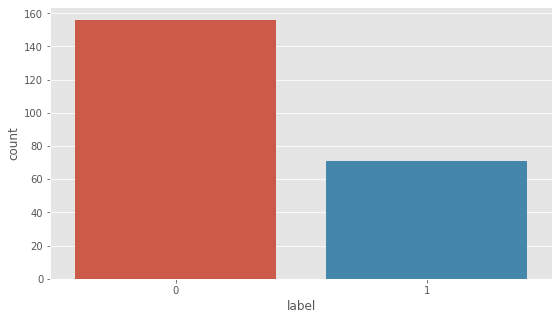

In [7]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= train["label"],data = train)
plt.show()

**Overview Test Data Set**

In [8]:
test.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,2,90.0,1,60,1,50,0,226000.0,1.0,134,1,0,30
1,4,58.0,1,200,1,60,0,300000.0,0.8,137,0,0,104
2,20,54.0,0,582,1,38,0,264000.0,1.8,134,1,0,213
3,23,45.0,0,582,0,35,0,385000.0,1.0,145,1,0,61
4,27,49.0,0,789,0,20,1,319000.0,1.1,136,1,1,55


In [9]:
test.describe()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000
mean,159.180556,61.750000,0.472222,526.111111,0.458333,38.347222,0.37500,275510.974306,1.370833,136.625000,0.62500,0.291667,132.069444
std,87.305732,12.085086,0.502731,933.591152,0.501757,12.945345,0.48752,102212.281070,1.058059,4.309954,0.48752,0.457719,74.587755
min,2.000000,40.000000,0.000000,23.000000,0.000000,14.000000,0.00000,119000.000000,0.600000,126.000000,0.00000,0.000000,10.000000
25%,89.750000,50.000000,0.000000,134.250000,0.000000,30.000000,0.00000,210250.000000,1.000000,134.000000,0.00000,0.000000,66.500000
50%,161.000000,61.500000,0.000000,316.500000,0.000000,38.000000,0.00000,260179.015000,1.100000,136.500000,1.00000,0.000000,125.500000
75%,231.250000,70.000000,1.000000,582.000000,1.000000,45.000000,1.00000,321250.000000,1.300000,139.000000,1.00000,1.000000,195.250000
max,297.000000,90.000000,1.000000,7702.000000,1.000000,70.000000,1.00000,621000.000000,9.000000,148.000000,1.00000,1.000000,270.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        72 non-null     int64  
 1   age                       72 non-null     float64
 2   anaemia                   72 non-null     int64  
 3   creatinine_phosphokinase  72 non-null     int64  
 4   diabetes                  72 non-null     int64  
 5   ejection_fraction         72 non-null     int64  
 6   high_blood_pressure       72 non-null     int64  
 7   platelets                 72 non-null     float64
 8   serum_creatinine          72 non-null     float64
 9   serum_sodium              72 non-null     int64  
 10  sex                       72 non-null     int64  
 11  smoking                   72 non-null     int64  
 12  time                      72 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 7.4 KB


# PART 2 - Transform Data For Training

In [11]:
train

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,label
0,0,45.0,0,2442,1,30,0,334000.00,1.10,139,1,0,129,1
1,1,65.0,1,305,0,25,0,298000.00,1.10,141,1,0,87,0
2,3,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
3,5,55.0,0,582,1,35,1,371000.00,0.70,140,0,0,197,0
4,6,53.0,1,91,0,20,1,418000.00,1.40,139,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,291,58.0,0,582,1,35,0,122000.00,0.90,139,1,1,71,0
223,293,59.0,1,129,0,45,1,362000.00,1.10,139,1,1,121,0
224,295,65.0,1,68,1,60,1,304000.00,0.80,140,1,0,79,0
225,296,53.0,0,196,0,60,0,220000.00,0.70,133,1,1,134,0


**Drop useless columns**

In [12]:
train1 = train.drop(['id'],axis=1)
test1 = test.drop(['id'],axis=1)

**Correlation Observations**

<AxesSubplot:>

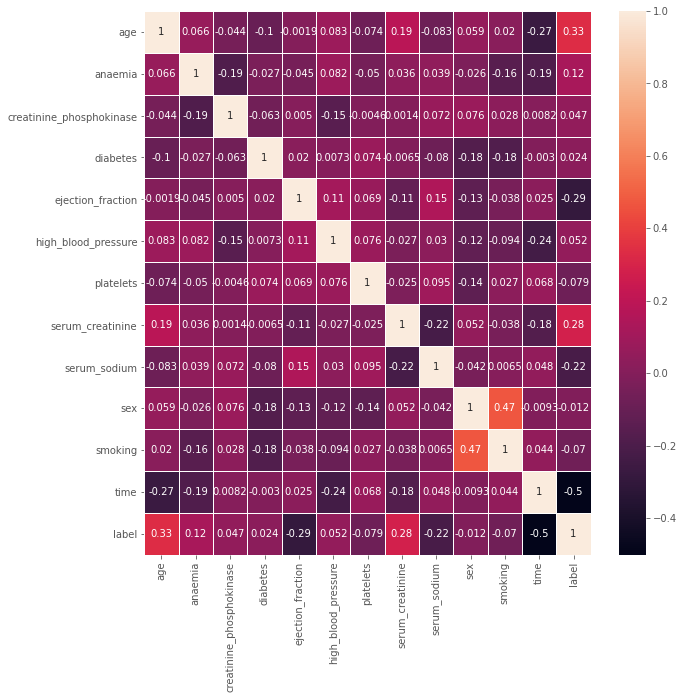

In [13]:
plt.subplots(figsize=(10,10))
sns.heatmap(train1.corr(), linewidths=1, annot=True)

**Correlation Observations With Respect To Target Value**

In [14]:
print(round(train1.corr()[['label']].drop('label'),2))

                          label
age                        0.33
anaemia                    0.12
creatinine_phosphokinase   0.05
diabetes                   0.02
ejection_fraction         -0.29
high_blood_pressure        0.05
platelets                 -0.08
serum_creatinine           0.28
serum_sodium              -0.22
sex                       -0.01
smoking                   -0.07
time                      -0.50


**Define a Function to get the Features that have Good Correlation with the Target Feature**

In [15]:
def feature(threshold) :
    absolute_correlation = (train1.corr()["label"].drop("label")).abs()
    high_correlation = absolute_correlation[absolute_correlation > threshold].index.values.tolist()
    return high_correlation

**Create a Set of Independent Features containing Correlation more than 0.05 as X and Dependent Target Feature Y**

In [16]:
Features = feature(0.1)
print(Features)

['age', 'anaemia', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']


**Splitting the Train Data**

In [17]:
x_train = train1[Features]
x_train.shape

(227, 6)

In [18]:
y_train = train1["label"]
y_train.shape

(227,)

**Splitting the Test Data**

In [19]:
x_test = test[Features]
x_test.shape

(72, 6)

**Scalling The Train Data**

In [20]:
sc1=StandardScaler()
x_train_transformed = sc1.fit_transform(x_train)
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

In [21]:
x_train_transformed.sample(3)

,age,anaemia,ejection_fraction,serum_creatinine,serum_sodium,time
109,-0.807398,-0.848350,0.174457,-0.488048,-0.590800,1.455691
62,-0.638191,1.178759,1.919022,-0.390670,0.534298,1.086397
68,-0.299777,1.178759,-0.697826,-0.390670,0.759317,-1.116634


**Scalling The Test Data**

In [22]:
sc2=StandardScaler()
x_test_transformed = sc2.fit_transform(x_test)
x_test_transformed = pd.DataFrame(x_test_transformed,columns=x_test.columns)

In [23]:
x_test_transformed.sample(3)

,age,anaemia,ejection_fraction,serum_creatinine,serum_sodium,time
42,0.020832,-0.945905,-0.027010,-0.257768,1.489514,1.862216
18,-0.145823,1.057188,1.684368,-0.352944,0.321268,0.188078
57,-0.645787,1.057188,2.462268,7.261129,0.087618,0.863134


# PART 3 - The Logistic Regression Model

**Create The Logistic Regression Model**

In [24]:
class LogisticRegressionModel:
    
    def __init__(self, n_iters, learning_rate):
        self.n_iters = n_iters
        self.learning_rate = learning_rate

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        for i in range(self.n_iters):
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
        return self.weights, self.bias, costs

    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        return np.array(y_predict_labels)[:, np.newaxis]

In [25]:
logistic_regression_model = LogisticRegressionModel(600, 0.0001)

**Train The Logistic Regression Model**

In [26]:
w_trained, b_trained, costs = logistic_regression_model.train(x_train_transformed, y_train[:, np.newaxis])

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.691532846179492
Cost after iteration 200: 0.6899297826987791
Cost after iteration 300: 0.6883379076773977
Cost after iteration 400: 0.686757138942797
Cost after iteration 500: 0.6851873946005821


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


**Coefficients of The Logistic Regression Model**

In [27]:
print(w_trained)
print(b_trained)
# print(costs)

[[ 0.00919113]
 [ 0.00331591]
 [-0.00806119]
 [ 0.00776786]
 [-0.0059554 ]
 [-0.01380305]]
-0.011149791126834379


**Predictions of Train and Test Data Sets**

In [28]:
predict_train1 = logistic_regression_model.predict(x_train_transformed).round(0)

In [29]:
predict_test1 = logistic_regression_model.predict(x_test_transformed).round(0)

**Predictions Parameters**

In [30]:
logistic_regression_model_accuracy = accuracy_score(y_train, predict_train1)
print(f"Accuracy Score of predictions of train: {logistic_regression_model_accuracy}")
print(f"RMSE of predictions of train: {np.sqrt(mean_squared_error(y_train, predict_train1))}")

Accuracy Score of predictions of train: 0.8414096916299559
RMSE of predictions of train: 0.3982339869599832


**Save Results in submisson_logistic.csv**

In [31]:
rst = predict_test1.round(0)
ids = test['id']

file = open("submission_logistic.csv", "w")
file.write("Id,label\n")
    
for id, pred in zip(ids, rst):
    file.write("{},{}\n".format(id, pred[0]))
    print(id, pred[0])
file.close()

2 1
4 0
20 0
23 0
27 1
30 1
41 1
43 0
44 0
52 1
53 0
60 0
63 0
65 0
67 0
75 0
83 0
86 1
91 0
92 0
94 0
99 0
106 1
113 1
119 0
120 0
122 1
123 0
124 0
126 0
127 0
134 1
139 0
145 1
156 0
158 0
164 0
168 1
170 0
171 1
172 0
178 1
186 0
187 0
194 0
201 0
204 1
206 0
208 0
216 1
219 0
223 0
225 0
229 1
238 0
250 0
254 1
258 1
261 0
267 0
269 0
270 1
274 1
276 0
278 1
280 0
283 0
285 1
288 0
292 1
294 1
297 0


# PART 4 - The Descision Tree Classifier Model

**Create The Descision Tree Classifier Model**

In [32]:
class DecisionTreeModel:

    def __init__(self):
        self.root_dict = None
        self.tree_dict = None

    def split_dataset(self, X, y, feature_idx, threshold):
        left_idx = np.where(X[:, feature_idx] < threshold)
        right_idx = np.where(X[:, feature_idx] >= threshold)
        
        left_subset = X[left_idx]
        y_left = y[left_idx]

        right_subset = X[right_idx]
        y_right = y[right_idx]

        splits = {
        'left': left_subset,
        'y_left': y_left,
        'right': right_subset,
        'y_right': y_right,}

        return splits

    def gini_impurity(self, y_left, y_right, n_left, n_right):

        n_total = n_left + n_left

        score_left, score_right = 0, 0
        gini_left, gini_right = 0, 0

        if n_left != 0:
            for c in range(self.n_classes):
                # For each class c, compute fraction of samples with class c
                p_left = len(np.where(y_left == c)[0]) / n_left
                score_left += p_left * p_left
            gini_left = 1 - score_left

        if n_right != 0:
            for c in range(self.n_classes):
                p_right = len(np.where(y_right == c)[0]) / n_right
                score_right += p_right * p_right
            gini_right = 1 - score_right

        return gini_left, gini_right

    def get_cost(self, splits):
        
        y_left = splits['y_left']
        y_right = splits['y_right']

        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right

        gini_left, gini_right = self.gini_impurity(y_left, y_right, n_left, n_right)
        cost = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

        return cost

    def find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_feature_idx, best_threshold, best_cost, best_splits = np.inf, np.inf, np.inf, None
        for feature_idx in range(n_features):
            for i in range(n_samples):
                current_sample = X[i]
                threshold = current_sample[feature_idx]
                splits = self.split_dataset(X, y, feature_idx, threshold)
                cost = self.get_cost(splits)

                if cost < best_cost:
                    best_feature_idx = feature_idx
                    best_threshold = threshold
                    best_cost = cost
                    best_splits = splits

        best_split_params = {
            'feature_idx': best_feature_idx,
            'threshold': best_threshold,
            'cost': best_cost,
            'left': best_splits['left'],
            'y_left': best_splits['y_left'],
            'right': best_splits['right'],
            'y_right': best_splits['y_right'],
        }

        return best_split_params


    def build_tree(self, node_dict, depth, max_depth, min_samples):
    
        left_samples = node_dict['left']
        right_samples = node_dict['right']
        y_left_samples = node_dict['y_left']
        y_right_samples = node_dict['y_right']

        if len(y_left_samples) == 0 or len(y_right_samples) == 0:
            node_dict["left_child"] = node_dict["right_child"] = self.create_terminal_node(np.append(y_left_samples, y_right_samples))
            return None

        if depth >= max_depth:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
            return None

        if len(right_samples) < min_samples:
            node_dict["right_child"] = self.create_terminal_node(y_right_samples)
        else:
            node_dict["right_child"] = self.find_best_split(right_samples, y_right_samples)
            self.build_tree(node_dict["right_child"], depth+1, max_depth, min_samples)

        if len(left_samples) < min_samples:
            node_dict["left_child"] = self.create_terminal_node(y_left_samples)
        else:
            node_dict["left_child"] = self.find_best_split(left_samples, y_left_samples)
            self.build_tree(node_dict["left_child"], depth+1, max_depth, min_samples)

        return node_dict

    def create_terminal_node(self, y):
        
        classification = max(set(y), key=list(y).count)
        return classification

    def train(self, X, y, max_depth, min_samples):
    
        self.n_classes = len(set(y))
        self.root_dict = self.find_best_split(X, y)
        self.tree_dict = self.build_tree(self.root_dict, 1, max_depth, min_samples)

    def predict(self, X, node):
       
        feature_idx = node['feature_idx']
        threshold = node['threshold']

        if X[feature_idx] < threshold:
            if isinstance(node['left_child'], (int, np.integer)):
                return node['left_child']
            else:
                prediction = self.predict(X, node['left_child'])
        elif X[feature_idx] >= threshold:
            if isinstance(node['right_child'], (int, np.integer)):
                return node['right_child']
            else:
                prediction = self.predict(X, node['right_child'])

        return prediction

In [33]:
descision_tree_model = DecisionTreeModel()

**Train The Descision Tree Classifier Model**

In [34]:
descision_tree_model.train(x_train_transformed.to_numpy(), y_train.to_numpy(), max_depth=5, min_samples=2)

**Predictions of Train and Test Data Sets**

In [35]:
predict_train2 = []
for i in range(x_train_transformed.shape[0]):
    prediction = descision_tree_model.predict(x_train_transformed.to_numpy()[i], descision_tree_model.tree_dict)
    predict_train2.append(prediction)

In [36]:
predict_test2 = []
for i in range(x_test_transformed.shape[0]):
    prediction = descision_tree_model.predict(x_test_transformed.to_numpy()[i], descision_tree_model.tree_dict)
    predict_test2.append(prediction)

**Predictions Parameters**

In [37]:
descision_tree_model_accuracy = accuracy_score(y_train, predict_train2)
print(f"Accuracy Score of predictions of train: {descision_tree_model_accuracy}")
print(f"RMSE of predictions of train: {np.sqrt(mean_squared_error(y_train, predict_train2))}")

Accuracy Score of predictions of train: 0.9162995594713657
RMSE of predictions of train: 0.2893102841736435


**Save Results in submisson_tree.csv**

In [38]:
rst = predict_test2
ids = test['id']

file = open("submission_tree.csv", "w")
file.write("Id,label\n")
    
for id, pred in zip(ids, rst):
    file.write("{},{}\n".format(id, pred))
    print(id, pred)
file.close()

2 1
4 0
20 0
23 0
27 1
30 0
41 1
43 0
44 0
52 1
53 1
60 0
63 0
65 0
67 0
75 0
83 0
86 0
91 0
92 0
94 0
99 0
106 1
113 1
119 0
120 0
122 1
123 0
124 1
126 0
127 1
134 1
139 0
145 1
156 0
158 1
164 1
168 0
170 0
171 1
172 0
178 1
186 0
187 0
194 1
201 1
204 0
206 0
208 0
216 1
219 0
223 1
225 0
229 1
238 1
250 0
254 1
258 0
261 0
267 0
269 0
270 1
274 1
276 0
278 1
280 0
283 1
285 0
288 0
292 0
294 1
297 0


# PART 5 - The Linear SVC Model

**Create The Linear SVC Model**

In [39]:
class SVM():

    def __init__(self, max_iter=10000, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j)
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
                
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)

In [40]:
svm_model = SVM(max_iter=100, kernel_type='linear', C=0.7, epsilon=0.0001)

**Train The Linear SVC Model**

In [41]:
k = svm_model.fit(x_train_transformed.to_numpy(), y_train.to_numpy())

**Predictions of Train and Test Data Sets**

In [42]:
predict_train3 = svm_model.predict(x_train_transformed.to_numpy())
predict_train3 = np.where(predict_train3==-1, 0, predict_train3)


In [43]:
predict_test3 = svm_model.predict(x_test_transformed.to_numpy())
predict_test3 = np.where(predict_test3==-1, 0, predict_test3)

**Predictions Parameters**

In [44]:
svm_model_accuracy = accuracy_score(y_train, predict_train3)
print(f"Accuracy Score of predictions of train: {svm_model_accuracy}")
print(f"RMSE of predictions of train: {np.sqrt(mean_squared_error(y_train, predict_train3))}")

Accuracy Score of predictions of train: 0.775330396475771
RMSE of predictions of train: 0.4739932526146644


**Save Results in submisson_svm.csv**

In [45]:
rst = predict_test3
ids = test['id']

file = open("submission_svm.csv", "w")
file.write("Id,label\n")
    
for id, pred in zip(ids, rst):
    file.write("{},{}\n".format(id, pred))
    print(id, pred)
file.close()

2 1
4 0
20 0
23 0
27 1
30 1
41 1
43 0
44 0
52 1
53 0
60 0
63 0
65 0
67 1
75 0
83 1
86 1
91 0
92 0
94 0
99 0
106 1
113 1
119 0
120 0
122 1
123 1
124 1
126 1
127 0
134 1
139 1
145 1
156 0
158 0
164 1
168 1
170 0
171 1
172 1
178 1
186 0
187 0
194 1
201 1
204 1
206 0
208 1
216 1
219 0
223 0
225 0
229 1
238 1
250 0
254 1
258 1
261 0
267 0
269 0
270 1
274 1
276 0
278 1
280 0
283 1
285 1
288 0
292 1
294 1
297 0


# PART 6 - The Random Forest Model

**Create The Random Forest Model**

In [46]:
def gini(labels):
    total_size = len(labels)

    label_quantities = np.unique(labels, return_counts=True)

    sum_of_probs_sq = 0
    for num_of_elem in label_quantities[1]:
        sum_of_probs_sq += (num_of_elem / total_size) ** 2
    return 1 - sum_of_probs_sq

class Node(object):
    def __init__(self, X, y, depth):
        self.X = X
        self.y = y
        self.depth = depth
        self.value = None
        self.feature = None
        self.left = None
        self.right = None
        self.prediction = None

    # Splits data according to the value of a specific feature
    def split_data(self, feature, value):
        rows = np.where(self.X[:, feature] >= value, True, False)

        X_right, y_right = self.X[rows], self.y[rows]
        X_left, y_left = self.X[~rows], self.y[~rows]

        return X_right, y_right, X_left, y_left

    def get_next(self, row):
        if row[self.feature] >= self.value:
            return self.right
        else:
            return self.left

class RandomForest(object):
    def __init__(self, X, y, num_trees, max_depth, sample_ratio, num_features, workers):
        self.X = X
        self.y = y
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.sample_ratio = sample_ratio
        self.num_features = num_features
        self.workers = workers
        self.trees = None

    def build_forest(self):
        self.trees = mp.Manager().list()
        start = time.time()

        jobs = []
        for i in range(self.workers):
            p = mp.Process(target=self.build_forest_function_with_process, args=[round(self.num_trees / self.workers)])
            jobs.append(p)
            p.start()

        for p in jobs:
            p.join()

        done = time.time()
        elapsed = done - start
        print("Num of tree built :", len(self.trees))
        print("Training time:", elapsed)
        print("Build done!")

    def build_forest_function_with_process(self, *args):
        iter_num = args[0]
        for i in range(iter_num):
            sub_X, sub_y = self.__subsample()
            root = Node(sub_X, sub_y, 0)
            features = self.__random_features()

            tree = Tree(root, features, self.max_depth)
            tree.build_tree()
            self.trees.append(tree)

    def accuracy(self, test_X, test_y):
        pred_list = []
        for row_X in test_X:
            pred_list.append(self.predict(row_X))
        pred_list = np.array(pred_list)
        return (pred_list == test_y).mean()

    def predict(self, test_X):
        pred_list = []
        for tree in self.trees:
            pred_list.append(tree.get_prediction(test_X))
        counts = np.bincount(pred_list)
        return np.argmax(counts)

    def __subsample(self):
        rand_indices = np.random.choice(self.X.shape[0], round(self.sample_ratio * self.X.shape[0]), replace=False)
        return self.X[rand_indices], self.y[rand_indices]

    def __random_features(self, ):
        feature_size = self.X.shape[1]
        return np.random.choice(feature_size, self.num_features, replace=False)
        

In [47]:
#  random_forest_model = RandomForest(x_train_transformed.to_numpy(), y_train.to_numpy(),
#                                       100, 10, 0.5, 6, 1)
# # random_forest_model.build_forest()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

**Train The Random Forest Model**

In [48]:
random_forest_model.fit(x_train_transformed, y_train)

RandomForestRegressor(random_state=0)

**Predictions of Train and Test Data Sets**

In [49]:
predict_train4 = random_forest_model.predict(x_train_transformed.to_numpy()).round(0)

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [50]:
predict_test4 = random_forest_model.predict(x_test_transformed.to_numpy()).round(0)

array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0.])

**Predictions Parameters**

In [51]:
random_forest_model_accuracy = accuracy_score(y_train, predict_train4)
print(f"Accuracy Score of predictions of train: {random_forest_model_accuracy}")
print(f"RMSE of predictions of train: {np.sqrt(mean_squared_error(y_train, predict_train4))}")

Accuracy Score of predictions of train: 1.0
RMSE of predictions of train: 0.0


**Save Results in submisson_random_tree.csv**

In [52]:
rst = predict_test4
ids = test['id']

file = open("submission_random_tree.csv", "w")
file.write("Id,label\n")
    
for id, pred in zip(ids, rst):
    file.write("{},{}\n".format(id, round(pred)))
    print(id, round(pred))
file.close()

2 1
4 0
20 0
23 0
27 1
30 0
41 1
43 0
44 0
52 1
53 0
60 0
63 0
65 0
67 0
75 0
83 0
86 0
91 0
92 0
94 0
99 0
106 1
113 1
119 0
120 0
122 1
123 0
124 0
126 0
127 0
134 1
139 0
145 1
156 0
158 1
164 1
168 0
170 0
171 1
172 0
178 1
186 0
187 0
194 0
201 1
204 0
206 0
208 0
216 1
219 0
223 0
225 0
229 1
238 1
250 0
254 1
258 0
261 0
267 0
269 0
270 1
274 1
276 0
278 1
280 0
283 1
285 1
288 0
292 1
294 1
297 0
